In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from plotly.subplots import make_subplots

import findspark
findspark.init()
import pyspark
import pyspark.sql.functions as f
from pyspark.sql import SparkSession

## Part 1: EDA

- Read the CSV file
- Display the first few rows of the DataFrame to verify
- Check the data types of each column in the DataFrame

In [290]:
df = pd.read_csv("/home/jony/Proyects/mall/Mall_Customers.csv").rename(columns={"Genre":"Gender"})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [291]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Part 2: Charts with plotly

- The task involves creating plots using the Plotly library in Python, which includes both Plotly Express and Plotly Graph Objects.


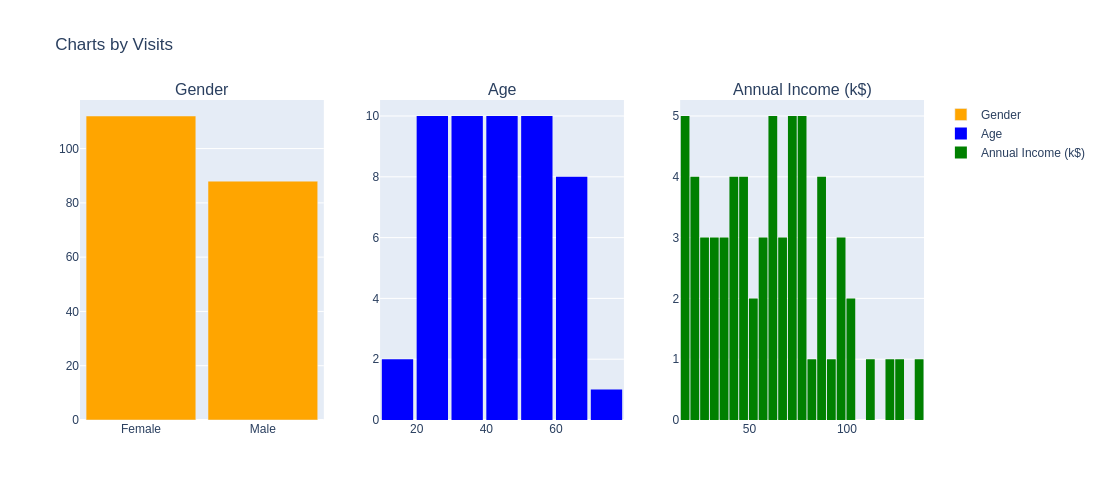

In [292]:
genre_count=df["Gender"].value_counts()
age_count=df["Age"].value_counts()
income_count=df["Annual Income (k$)"].value_counts()

fig = make_subplots(rows=1, cols=3, subplot_titles=("Gender", "Age", "Annual Income (k$)"))

fig.add_trace(go.Bar(x=genre_count.index,
                     y=genre_count.values,
                     name="Gender",
                     marker_color="orange"),
              row=1, col=1)

fig.add_trace(go.Histogram(x=age_count.index,
                     y=age_count.values,
                     name="Age",
                     nbinsx=8,
                     marker_color="blue"),
              row=1, col=2)

fig.add_trace(go.Histogram(x=income_count.index, 
                     y=income_count.values,
                     name="Annual Income (k$)",
                     nbinsx=30,
                     marker_color="green"),
              row=1, col=3)

fig.update_layout(height=500, width=1100,bargap=0.1, title_text="Charts by Visits")

/home/jony/anaconda3/envs/mall/lib/python3.12/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



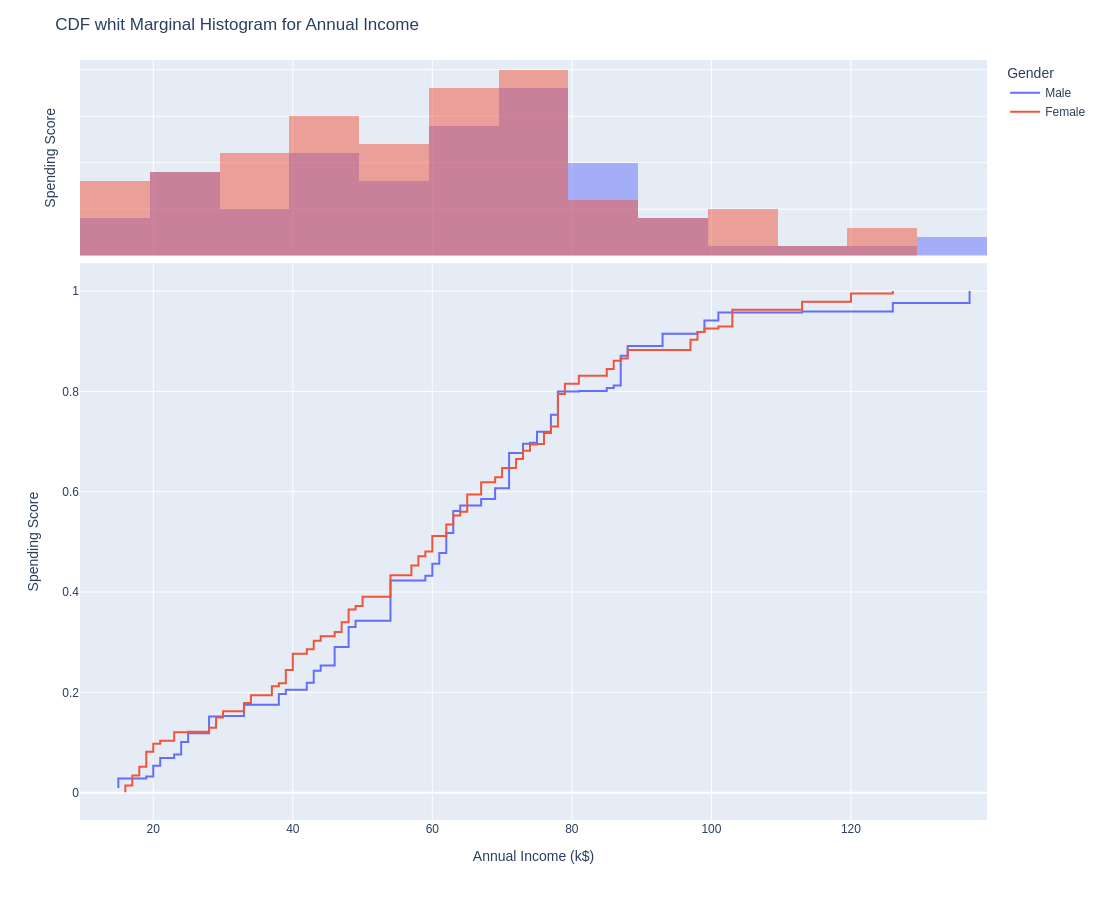

In [295]:
fig = px.ecdf(df, x="Annual Income (k$)", 
              y="Spending Score (1-100)", 
              color="Gender",
              marginal="histogram",
              height=900,
              width=800)

fig.update_yaxes(title_text="Spending Score")
fig.update_layout(title="CDF whit Marginal Histogram for Annual Income")

/home/jony/anaconda3/envs/mall/lib/python3.12/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



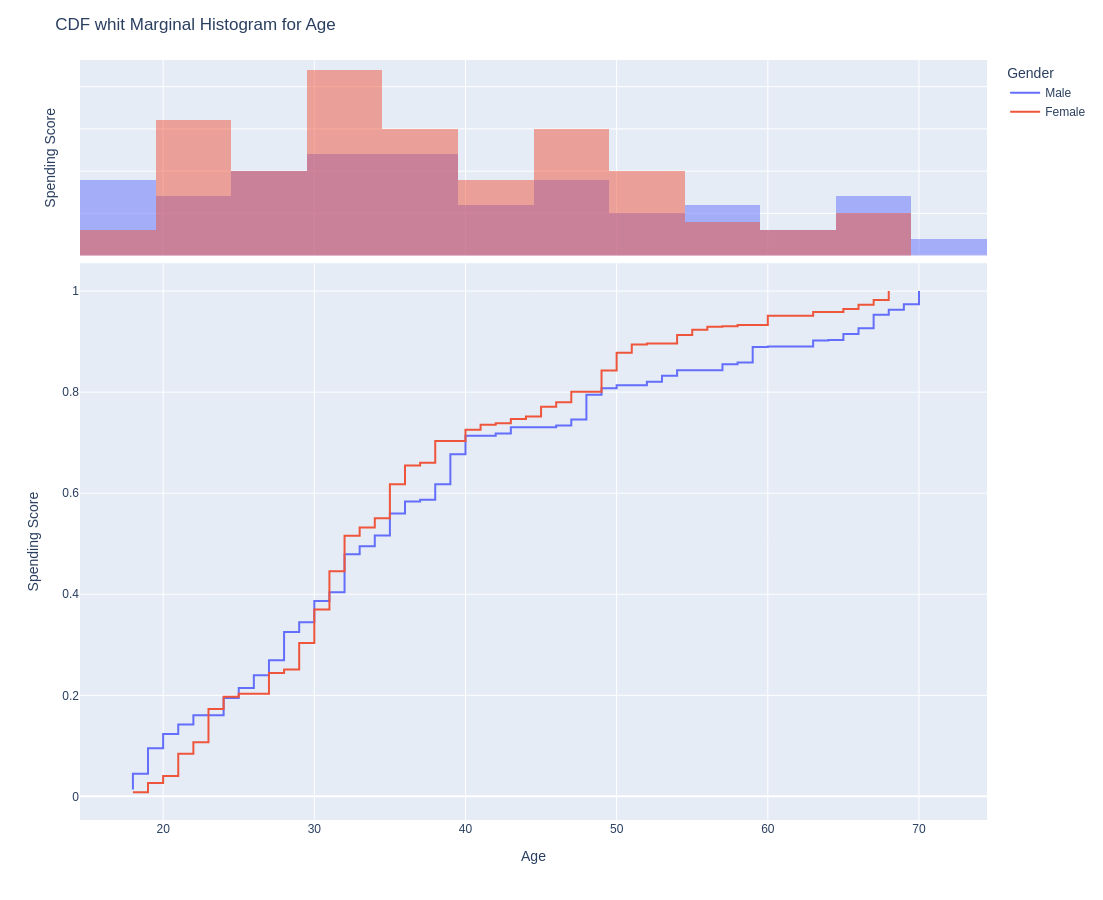

In [294]:
fig = px.ecdf(df, x="Age", 
              y="Spending Score (1-100)", 
              color="Gender",
              marginal="histogram",
              height=900,
              width=800,
              )

fig.update_yaxes(title_text="Spending Score")
fig.update_layout(title="CDF whit Marginal Histogram for Age")

### Scatter plot of Age vs. Spending Score:

- This plot illustrates the relationship between customers' age and their spending score. Each point on the plot represents a customer, with the horizontal position (x-axis) indicating their age and the vertical position (y-axis) indicating their spending score. The dispersion of points on the plot reveals how spending scores are distributed across different age groups, providing insights into how spending behavior varies with customers' age.

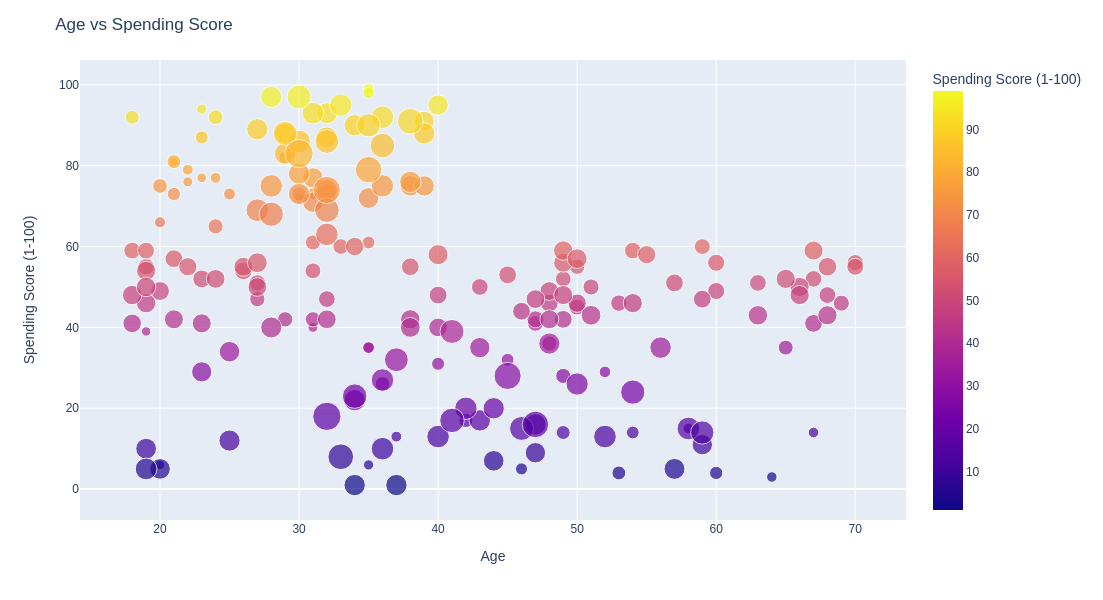

In [266]:
fig = px.scatter(df, x="Age", 
                 y="Spending Score (1-100)",
                 size="Annual Income (k$)",
                 color="Spending Score (1-100)",
                 height=600, 
                 width=1100
                )
fig.update_layout(title_text="Age vs Spending Score")

### Scatter plot of Age vs. Annual Income:

- This plot represents the relationship between customers' age and their annual income, segmented by gender. Each point on the plot represents a customer, with the horizontal position (x-axis) indicating their age and the vertical position (y-axis) indicating their annual income. The dispersion of points on the plot shows how annual incomes are distributed across different age and gender groups, providing information about the relationship between age, gender, and customers' income levels.

/home/jony/anaconda3/envs/mall/lib/python3.12/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



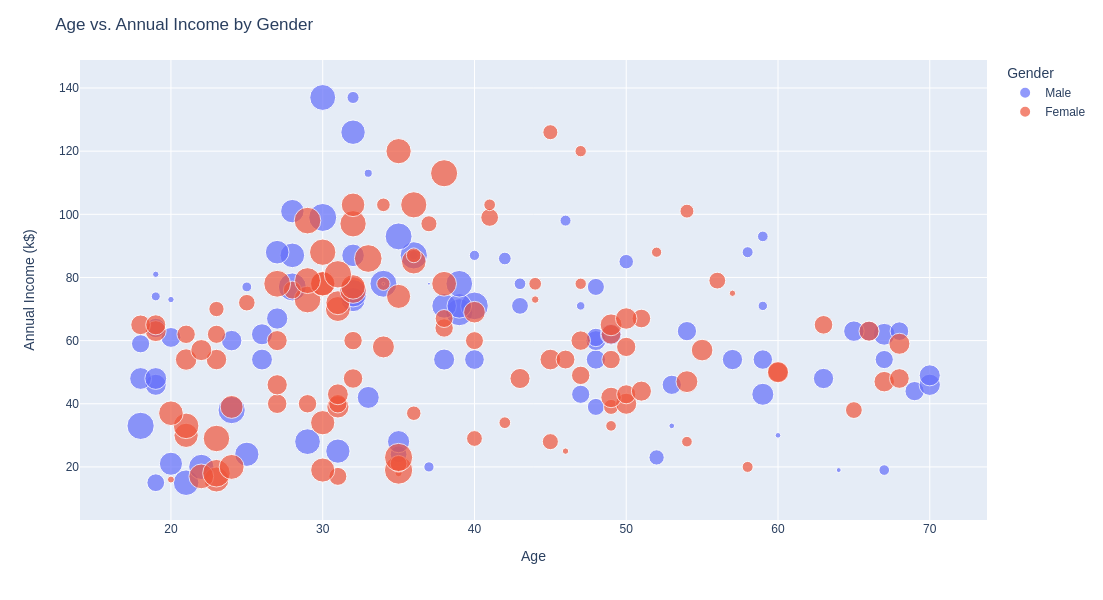

In [267]:
fig = px.scatter(df, x="Age", 
                 y="Annual Income (k$)",
                 size="Spending Score (1-100)",
                 color="Gender",
                 height=600, 
                 width=1100
                )

fig.update_layout(title_text="Age vs. Annual Income by Gender")

## Part 3: Shopping Mall Customer Segmentation Results
- using PySpark and SQL Queries

In [268]:
sc = pyspark.SparkContext.getOrCreate()
spark = pyspark.SQLContext.getOrCreate(sc)

/home/jony/anaconda3/envs/mall/lib/python3.12/site-packages/pyspark/sql/context.py:157: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



### Basic DataFrame Operations: Creation, Reading, and Visualization

In [269]:
df = spark.read.csv("/home/jony/Proyects/mall/Mall_Customers.csv", 
                    header=True, 
                    inferSchema=True).withColumnRenamed("Genre", "Gender")

In [270]:
df.show(5)

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



#### Average age customers

In [271]:
avg_age = df.select(f.avg("Age").alias("average age"))

avg_age.show()

+-----------+
|average age|
+-----------+
|      38.85|
+-----------+



#### Average annual income customers

In [272]:
income = df.select(f.avg("Annual Income (k$)").alias("Annual Income"))

income.show()

+-------------+
|Annual Income|
+-------------+
|        60.56|
+-------------+



#### Percentage Analysis by Age, Annual Income, and Spending Score

In [273]:
young_hi_hs = df.filter(
    (f.col("Age") < 30) & 
    (f.col("Annual Income (k$)") > 75) & 
    (f.col("Spending Score (1-100)") > 70)
).count() * 100 / df.filter(f.col("Age") < 30).count()

print(
    "Percentage of young customers with high income and high spending :", young_hi_hs)

Percentage of young customers with high income and high spending : 9.090909090909092


In [274]:
young_li_ls = df.filter(
    (f.col("Age") < 30) &
    (f.col("Annual Income (k$)") < 33) &
    (f.col("Spending Score (1-100)") > 30)
).count() * 100 / df.filter(f.col("Age") < 30).count()

print(
    "Percentage of young customers with low income and low spending :", young_li_ls)

Percentage of young customers with low income and low spending : 21.818181818181817


In [275]:
young_li_hs = df.filter(
    (f.col("Age") < 30) &
    (f.col("Annual Income (k$)") < 33) &
    (f.col("Spending Score (1-100)") > 70)
).count() * 100 / df.filter(f.col("Age") < 30).count()

print(
    "Percentage of young customers with low income and high spending :", young_li_hs)

Percentage of young customers with low income and high spending : 18.181818181818183


In [276]:
young_hi_ls = df.filter(
    (f.col("Age") < 30) &
    (f.col("Annual Income (k$)") < 75) &
    (f.col("Spending Score (1-100)") > 30)
).count() * 100 / df.filter(f.col("Age") < 30).count()

print(
    "Percentage of young customers with high income and low spending :", young_hi_ls)

Percentage of young customers with high income and low spending : 74.54545454545455


In [277]:
adult_hi_hs = df.filter(
    (f.col("Age") >= 30) &
    (f.col("Annual Income (k$)") > 75) &
    (f.col("Spending Score (1-100)") > 70)
).count() * 100 / df.filter(f.col("Age") >= 30).count()

print(
    "Percentage of adult customers with high income and high spending :", adult_hi_hs)
    

Percentage of adult customers with high income and high spending : 13.793103448275861


In [278]:
adult_li_ls = df.filter(
    (f.col("Age") >= 30) &
    (f.col("Annual Income (k$)") < 33) &
    (f.col("Spending Score (1-100)") > 30)
).count() * 100 / df.filter(f.col("Age") >= 30).count()

print(
    "Percentage of adult customers with low income and low spending :", adult_li_ls)

Percentage of adult customers with low income and low spending : 6.896551724137931


In [279]:
adult_li_hs = df.filter(
    (f.col("Age") >= 30) &
    (f.col("Annual Income (k$)") < 33) &
    (f.col("Spending Score (1-100)") > 70)
).count() * 100 / df.filter(f.col("Age") >= 30).count()

print(
    "Percentage of adult customers with low income and high spending :", adult_li_hs)

Percentage of adult customers with low income and high spending : 2.7586206896551726


In [280]:
adult_hi_ls = df.filter(
    (f.col("Age") >= 30) &
    (f.col("Annual Income (k$)") < 75) &
    (f.col("Spending Score (1-100)") > 30)
).count() * 100 / df.filter(f.col("Age") >= 30).count()

print(
    "Percentage of adult customers with high income and low spending :", adult_hi_ls)

Percentage of adult customers with high income and low spending : 53.793103448275865


In [281]:
young_avg = df.filter(
     (f.col("Age") < 30) &
     (f.col("Annual Income (k$)").between(33, 75)) &
     (f.col("Spending Score (1-100)").between(30, 70))
).count() * 100 / df.filter(f.col("Age") < 30).count()

print(
    "Percentage of Young customers with Average Income and Spending :", young_avg)

Percentage of Young customers with Average Income and Spending : 43.63636363636363


In [282]:
adult_avg = df.filter(
     (f.col("Age") >= 30) &
     (f.col("Annual Income (k$)").between(33, 75)) &
     (f.col("Spending Score (1-100)").between(30, 70))
).count() * 100 / df.filter(f.col("Age") >= 30).count()

print(
    "Percentage of Adult customers with Average Income and Spending :", adult_avg)

Percentage of Adult customers with Average Income and Spending : 40.689655172413794


#### Predominant Gender Analysis of Mall Consumers

In [283]:
pred_gender_young = df.filter(
    f.col("Age") < 30
).groupBy("Gender").count().orderBy(f.desc("count")).first()["Gender"]


print(
    "Predominant gender among young customers :", pred_gender_young)

Predominant gender among young customers : Female


In [284]:
pred_gender_adult = df.filter(
    f.col("Age") >= 30
).groupBy("Gender").count().orderBy(f.desc("count")).first()["Gender"]


print(
    "Predominant gender among adult customers :", pred_gender_adult)

Predominant gender among adult customers : Female
